## Examples

This notebook shows some examples of using aldyparen-py as Python library.

In [1]:
from matplotlib import pyplot as plt
from time import time

from aldyparen import ColorPalette, Transform, Frame, StaticRenderer, VideoRenderer
from aldyparen.painters import MandelbroidPainter, MandelbrotHighPrecisionPainter, JuliaPainter

### Example 1: Mandelbrot set

Time: 0.085s


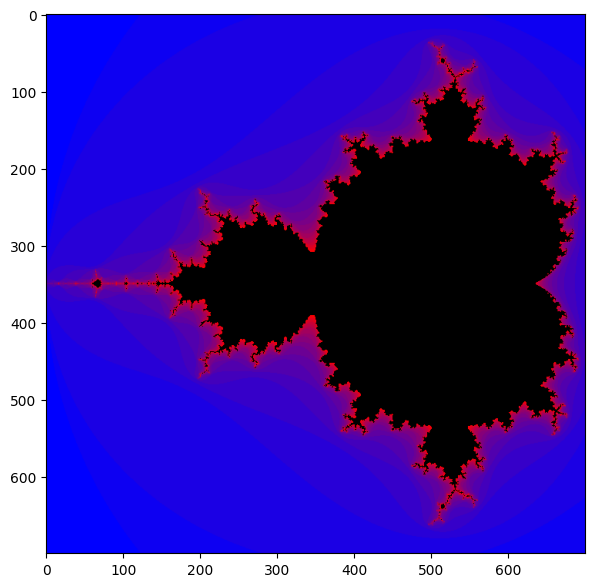

In [2]:
painter = MandelbroidPainter(gen_function="z*z+c", max_iter=20)
transform = Transform.create(center=-0.75, scale=2.5)
palette = ColorPalette.gradient_plus_one('blue', 'red', 'black', 21)
frame = Frame(painter, transform, palette)

t0 = time()
image = StaticRenderer(700,700).render(frame)
print("Time: %.3fs" % (time() - t0))
plt.figure(figsize=(7,7))
plt.imshow(image)
plt.show()

### Example 2: Burning ship

Time: 0.158s


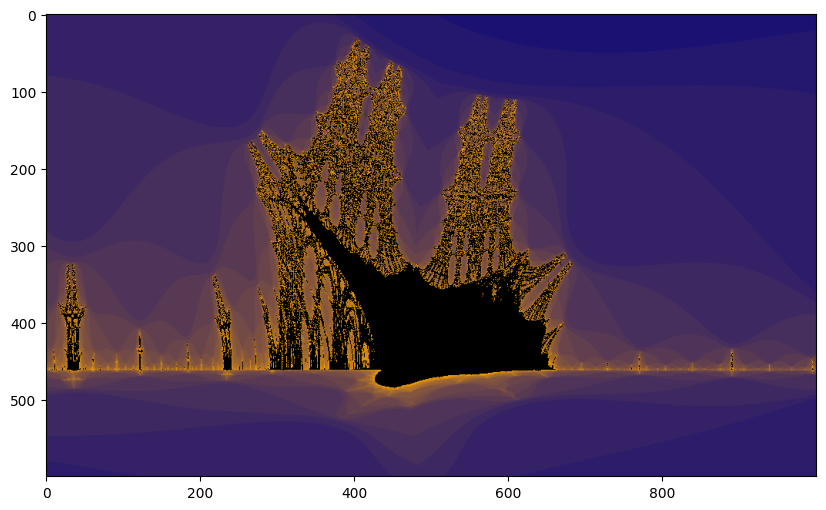

In [3]:
painter = MandelbroidPainter(gen_function="(abs(real(z))+1j*abs(imag(z)))**2+c", max_iter=30)
transform = Transform.create(center=-1.76-0.03j,scale=0.185, rotation_deg=180)
palette = ColorPalette.gradient_plus_one('navy', 'orange', 'black', 31)
frame = Frame(painter, transform, palette)

t0 = time()
image = StaticRenderer(1000,600).render(frame)
print("Time: %.3fs" % (time() - t0))
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.show()

### Example 3: Animation

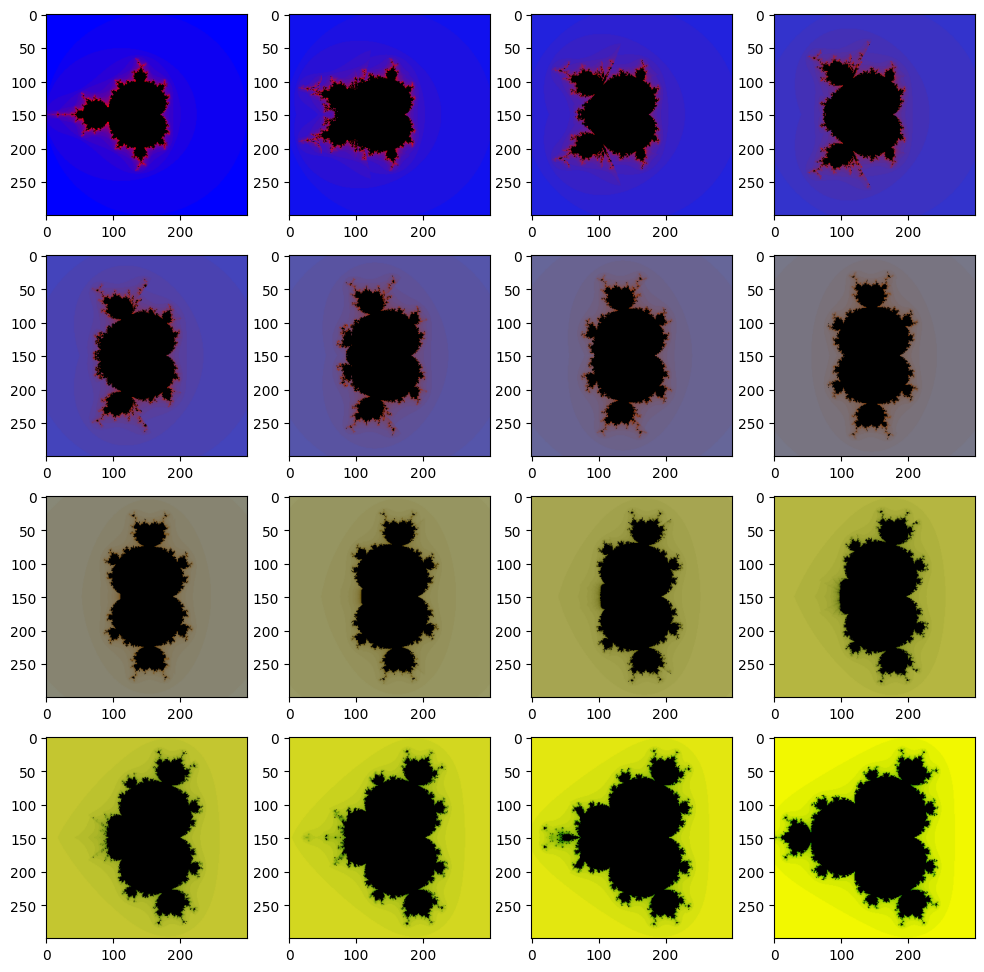

In [4]:
from aldyparen.mixing import make_animation

painter1 = MandelbroidPainter(gen_function="z**2+c", max_iter=20)
palette1 = ColorPalette.gradient_plus_one('blue', 'red', 'black', 21)
painter2 = MandelbroidPainter(gen_function="z**4+c", max_iter=20)
palette2 = ColorPalette.gradient_plus_one('yellow', 'green', 'black', 21)
transform1 = Transform.create(scale=4)
transform2 = Transform.create(scale=2.5)

frame1 = Frame(painter1, transform1, palette1)
frame2 = Frame(painter2, transform2, palette2)
N = 16
animation = make_animation(frame1, frame2, N-1)
renderer = StaticRenderer(300,300)
images = [renderer.render(frame) for frame in animation]

_, ax = plt.subplots(4, 4, figsize=(12,12))
for i in range(N):
  ax[i//4][i%4].imshow(images[i])

### Example 4: High-precision Mandelbrot set

Regular double precision starts failing when zoom is too high. Two pictires below show the same place in Mandelbrot set at scale $10^{-14}$ (that is, width of shown part of complex plane $10^{-14}$). The left picture uses standard 64-bit double precision. The right picture uses long arithmetic.

Time: 9.902s


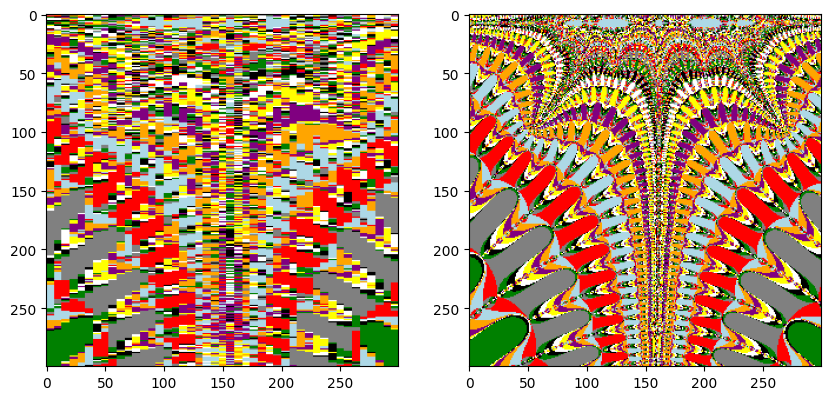

In [5]:
painter1 = MandelbroidPainter(gen_function="z*z+c", max_iter=400)
painter2 = MandelbrotHighPrecisionPainter(max_iter=400)
center = -1.9997740760915-4.713e-15j
transform = Transform.create(center=center,scale=1e-14)
palette = ColorPalette.default()
renderer = StaticRenderer(300,300)
frame1 = Frame(painter1, transform, palette)
frame2 = Frame(painter2, transform, palette)

image1 = renderer.render(frame1)
t0 = time()
image2 = renderer.render(Frame(painter2, transform, palette))
print("Time: %.3fs" % (time() - t0))

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image1)
ax2.imshow(image2)

### Example 5: Newton fractal for $P(z) = z^5-1$

Time: 0.588s


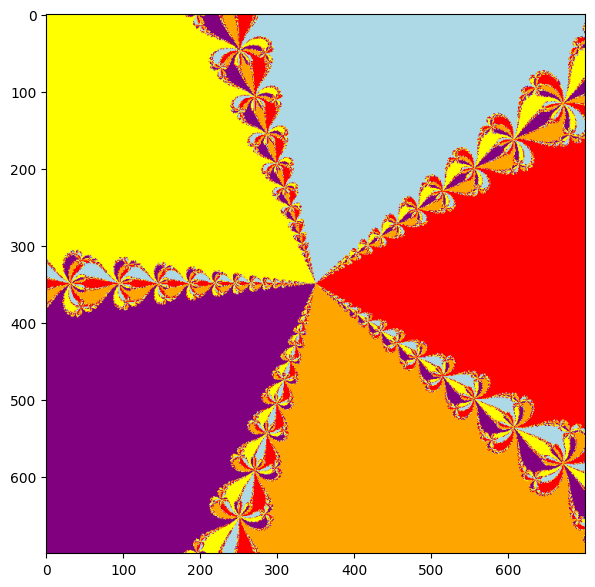

In [6]:
painter = JuliaPainter(func="z-(z**5-1)/(5*z**4)")
frame = Frame(painter, Transform(0, 4, 0), ColorPalette.default())

t0 = time()
image = StaticRenderer(700,700).render(frame)
print("Time: %.3fs" % (time() - t0))
plt.figure(figsize=(7,7))
plt.imshow(image)
plt.show()